100


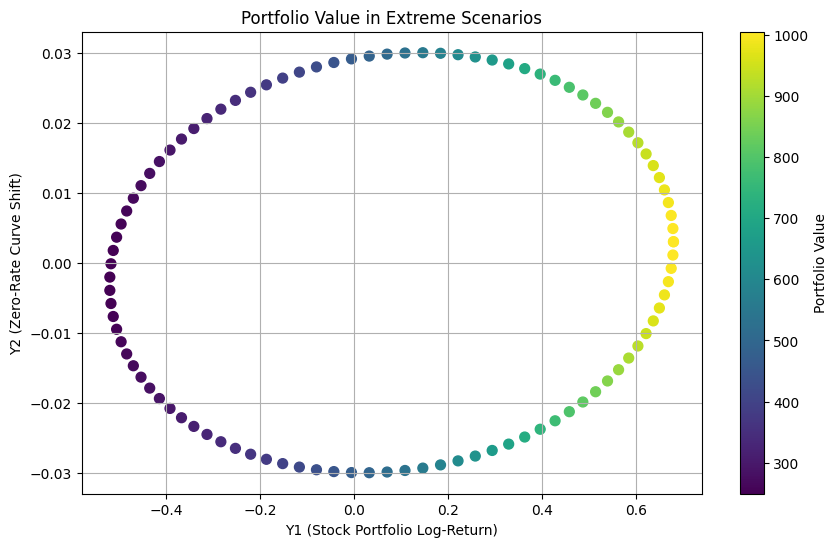

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
mu1 = 0.08  # Mean log-return of the stock portfolio
mu2 = 0.0   # Mean shift of the zero-rate curve
sigma1 = 0.2  # Std deviation of the stock portfolio log-return
sigma2 = 0.01 # Std deviation of the zero-rate shift
rho = 0.1     # Correlation coefficient
liabilities = 100  # Liability cash flow per year
time_horizon = 30  # Years of liability
initial_capital = 1.3  # Initial capital as 130% of liability present value

# Bond portfolio cash flows (up to 10 years)
bond_payments = np.array([4, 2, 3, 1, 4, 2, 3, 1, 5, 5])
zero_rates = np.array([2.86, 3.24, 3.55, 3.93, 4.27, 4.62, 4.96, 5.30, 5.55, 5.80]) / 100
years = np.arange(1, 11)

# Compute present value of liabilities
liability_pv = sum(liabilities / ((1 + zero_rates[-1]) ** np.arange(1, time_horizon + 1)))

# Allocate initial capital
initial_assets = initial_capital * liability_pv
bond_investment = 0.7 * initial_assets
stock_investment = 0.3 * initial_assets

# Calculate bond portfolio present value
bond_pv = np.sum(bond_payments / ((1 + zero_rates) ** years))

# Generate equally likely extreme scenarios
theta = np.linspace(0, 2 * np.pi, 100)
Z1 = 3 * np.cos(theta)
Z2 = 3 * np.sin(theta)

# Transform Z1, Z2 to Y1, Y2
Y1 = mu1 + sigma1 * Z1
Y2 = sigma2 * (rho * Z1 + np.sqrt(1 - rho**2) * Z2)

# Calculate portfolio values for each scenario
portfolio_values = []
for y1, y2 in zip(Y1, Y2):
    # Stock portfolio value after one year
    stock_value = stock_investment * np.exp(y1)
    
    # Shifted zero rates
    shifted_zero_rates = zero_rates + y2
    
    # Bond portfolio value after one year
    bond_value = np.sum(bond_payments / ((1 + shifted_zero_rates) ** years))
    
    # Net portfolio value
    net_value = stock_value + bond_value - liabilities
    portfolio_values.append(net_value)

portfolio_values = np.array(portfolio_values)

print( np.size(portfolio_values))

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(Y1, Y2, c=portfolio_values, cmap='viridis', s=50)
plt.colorbar(label='Portfolio Value')
plt.title('Portfolio Value in Extreme Scenarios')
plt.xlabel('Y1 (Stock Portfolio Log-Return)')
plt.ylabel('Y2 (Zero-Rate Curve Shift)')
plt.grid()
plt.show()



Most dangerous extreme scenario:
Y1 (Stock Portfolio Log-Return): -0.5196979254299111
Y2 (Zero-Rate Curve Shift): -0.002051422770071607
Minimum Portfolio Value: 249.2547187790957


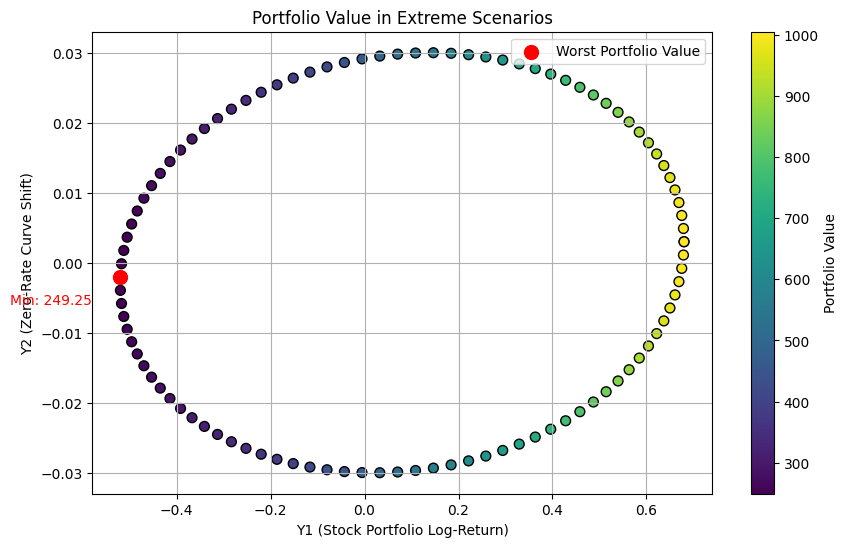

In [10]:
# Find the worst-case scenario
min_value_index = np.argmin(portfolio_values)  # Index of the minimum portfolio value
worst_Y1 = Y1[min_value_index]  # Corresponding Y1
worst_Y2 = Y2[min_value_index]  # Corresponding Y2
worst_portfolio_value = portfolio_values[min_value_index]  # Minimum portfolio value

# Print the results
print(f"Most dangerous extreme scenario:")
print(f"Y1 (Stock Portfolio Log-Return): {worst_Y1}")
print(f"Y2 (Zero-Rate Curve Shift): {worst_Y2}")
print(f"Minimum Portfolio Value: {worst_portfolio_value}")

# Enhanced Visualization for Part B (a) and Explanation of Worst Portfolio Value

import matplotlib.pyplot as plt

# Enhanced plot of portfolio values with the worst case highlighted
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Y1, Y2, c=portfolio_values, cmap='viridis', s=50, edgecolor='k')
plt.colorbar(scatter, label='Portfolio Value')
plt.title('Portfolio Value in Extreme Scenarios')
plt.xlabel('Y1 (Stock Portfolio Log-Return)')
plt.ylabel('Y2 (Zero-Rate Curve Shift)')

# Highlight the worst-case scenario
plt.scatter(worst_Y1, worst_Y2, color='red', s=100, label='Worst Portfolio Value')
plt.annotate(f"Min: {worst_portfolio_value:.2f}",
             (worst_Y1, worst_Y2),
             textcoords="offset points",
             xytext=(-50, -20),
             ha='center',
             color='red',
             fontsize=10)
plt.legend()
plt.grid()
plt.show()